# Machine Learning 2 Group B - Machine Learning Workflow


#### Term 2 - Team B
Maria Graciela Missura Donoso <br>
Martina Cilia <br>
Alexander Humpert <br>
Ignacio Gonzalez <br>
Philippe Kerno <br>
Thomas Truyts<br>
Marco Nebuloni

#### Notebook Summary

This notebook contains the machine learning workflow for the Forest Cover Type Prediction Challenge. 

We iterated through four tree-based classification algorithms, hyperparameter optimization and feature creation techniques to arrive at our best model - a hyper-parameter tuned Random Forest Classifier with a test accuracy of 90%, trained on a dataset where manual feature creation was conducted.

The final predictions from our tuned Random Forest Classifier achieved an accuracy of 79.7% on the unseen Kaggle competition test set - ranking in the 89th percentile of all competition participants. 

Table of Contents.

* [1. Importing Libraries](#1)
* [2. Importing Data](#2)
* [3. Data Exploration](#3)
    * [3.1 Size, data types, missing features and label distribution](#3.1)
    * [3.2 Missing Data](#3.2)
    * [3.3 Finding Outliers](#3.3)
    * [3.4 Understanding How Features Interact](#3.4)
* [4. Baseline Model: Decision Tree Classifier](#4)
    * [4.1 Defining model evaluation and feature extraction functions](#4.1)
    * [4.2 Running Model](#4.2)
* [5. Changing our Model - Features](#5)
    * [5.1 Decision Tree Classifier with Extra Features](#5.1)
* [6. Changing our model - Algorithms](#6)
    * [6.1 Random Forest Classifier with Extra Features](#6.1)
    * [6.2 Gradient Boosted Classifier with Extra Features](#6.2)
    * [6.3 Extra Trees Classifier with Extra Features](#6.3)
* [7. Changing our model - Hyperparameter Tuning](#7)
    * [7.1 Tuned Random Forest Classifier with Extra Features](#7.1)
    * [7.2 Tuned Gradient Boosted Classifier with Extra Features](#7.2)
* [8. Final Model - Voting Classifier](#8)




<a id='1'></a>
## 1. Importing Libraries

In [1]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Source

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler, StandardScaler, RobustScaler)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import tree, ensemble
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    classification_report
)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='2'></a>
## 2. Importing Data

In [2]:
import pandas as pd

# Reading test set
tester = pd.read_csv('test.csv').drop(columns = "Id")

# Reading train set
data = pd.read_csv('train.csv').drop(columns = "Id")

<a id='3'></a>
## 3. Data Exploration

In this section we will use different methods to understand our initial data better. This will give us information for building our first baseline model.

<a id='3.1'></a>
### 3.1 Size, data types, missing features and label distribution

In [3]:
# What does this train set look like?
print(f"Number of features in train set: {data.shape[1]}")
print(f"Number of rows in trains set: {data.shape[0]}")

Number of features in train set: 55
Number of rows in trains set: 15120


In [4]:
# What does this train set look like?
print(f"Number of features in test set: {tester.shape[1]}")
print(f"Number of rows in test set: {tester.shape[0]}")

Number of features in test set: 54
Number of rows in test set: 565892


As we can see, the test set has one less feature - the target variable "Cover_type".

In [5]:
# looking for the types of the data
print(f"Types of data in dataset:\n\n{data.dtypes}")

Types of data in dataset:

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_

Each feature in our dataset is a numeric data type. However, this does not exclude the possibility that the numeric feature represents categorical or binary information, afterall, these may be represented as numeric values.

In [6]:
# Identifying data type of each feature

data_stats = data.describe()
data_stats

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


By looking at summary statistics of our data, in particular "min" and "max", we see that each "Soil_Type" and "Wilderness_Area" feature is binary, encoded as 0 or 1. All remaining features are numeric, besides the target variable "Cover_Type", which is categorical. For convenience, we can go ahead and create two new dataframes based on these separate values for use down the line.

This information will also be very useful when we build a pipeline for columntransformers.

In [7]:
# Creating new dataframe of only numerical features
data_numeric = data.iloc[:, 0:10]

# Creating new dataframe of only binary features
data_binary = data.iloc[:, 10:].drop(columns = "Cover_Type")

print(f"Number of numeric features: {len(data_numeric.columns)}")
print(f"Number of binary features: {len(data_binary.columns)}")

Number of numeric features: 10
Number of binary features: 44


In [8]:
#Check target label distributions
target_prop = data["Cover_Type"].value_counts()

print(f"Proportion of target variables:\n{target_prop}")

Proportion of target variables:
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64


Our dataset is balanced. This is a huge relief as it means our model evaluation metrics, such as accuracy, are more trustworthy. Furthermore, we don't have to risk balancing the data by creating more data.

In [9]:
# Looking at the data itself
data.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


<a id='3.2'></a>
### 3.2 Missing Data

In [11]:
# Looking for missing values for each feature
print(f"Number of missing values:\n{data.isna().mean()}")


Number of missing values:
Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Typ

Here we can see that we have no missing values. We not have to worry about inputing values later on.

<a id='3.3'></a>
### 3.3 Finding Outliers

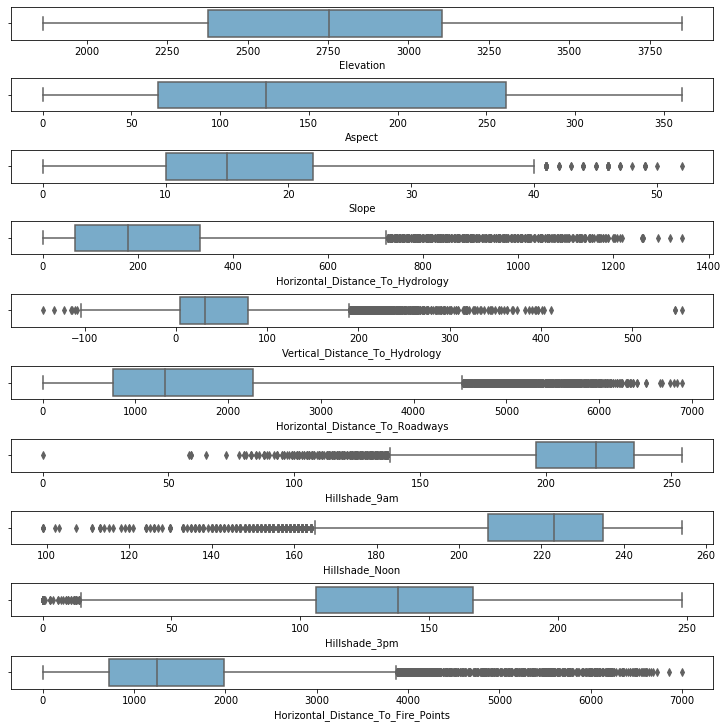

In [219]:
# Creating Box Plots
# Outliers in numerical features -> some features have large number of outliers  
fig, axes = plt.subplots(len(data_numeric.columns), 1, figsize=(10,10), constrained_layout=True)


for i, col in enumerate(data_numeric):
    sns.boxplot(x=data[col], palette='Blues_r', ax=axes[i])


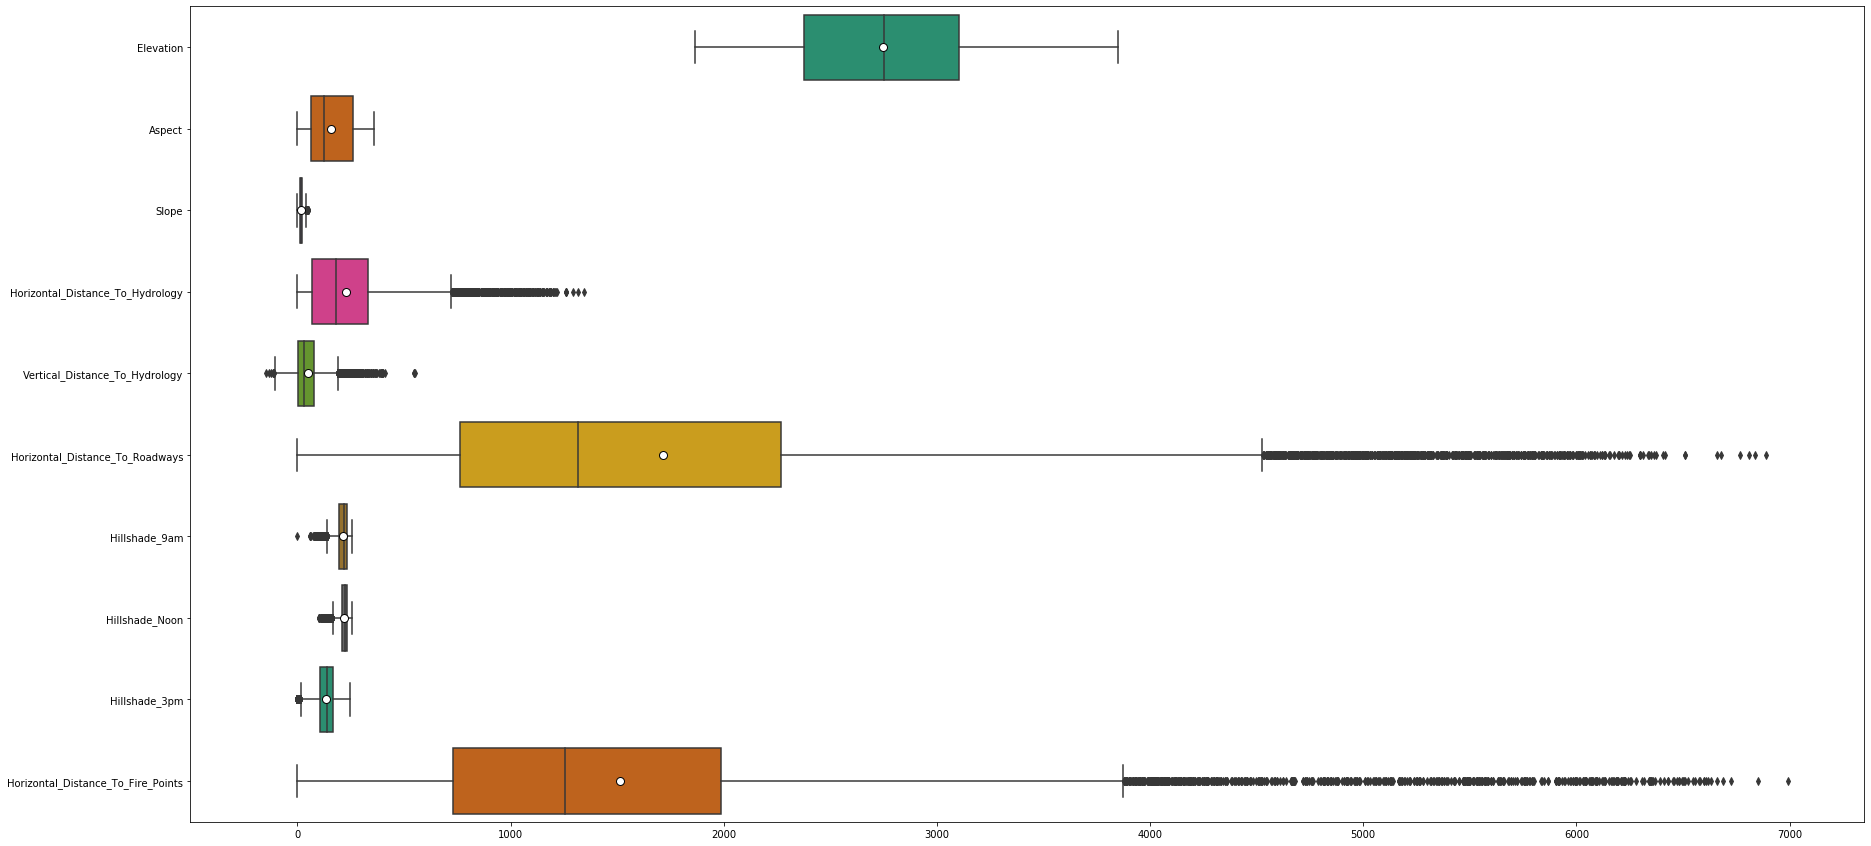

In [152]:
#Outliers in numerical features -> some features have large number of outliers  
plt.figure(figsize=(30,15))
boxplot = sns.boxplot(data=data_numeric, orient="h", palette="Dark2", showmeans=True, meanprops={"marker":"o",
"markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})

Every numerical feature besides Elevation and Aspect have outliers. This suggests we may have to consider outlier handling in our pipelines - perhaps through clamping, scaling or taking logs. Especially if we our considering using distance-based classification algorithms or feature selection techniques that are highly sensitive to ouliers.

<a id='3.4'></a>
### 3.4 Understanding How Features Interact

#### Correlations

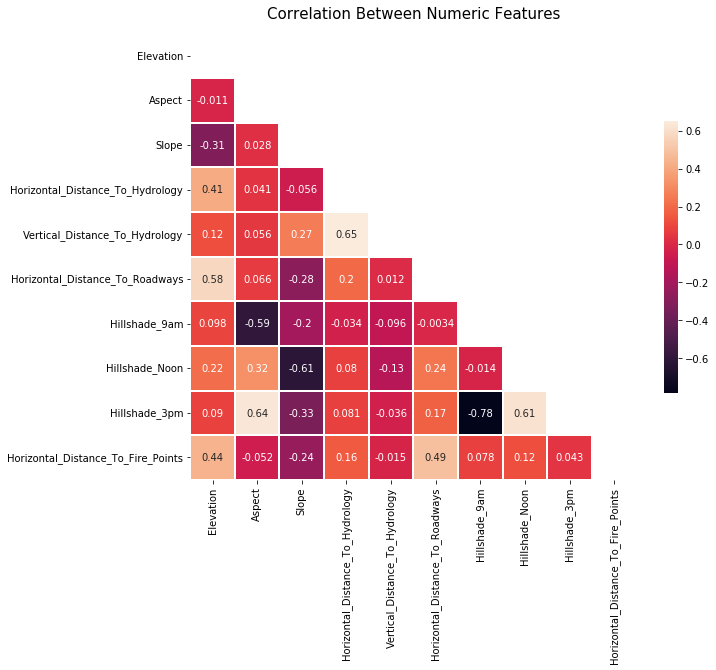

In [9]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(10,10))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

#### Pairplots

In [12]:
# Addding "Cover_Type" column to numeric only dataframe
data_numeric["Cover_Type"] = data["Cover_Type"]

/Users/alexanderhumpert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


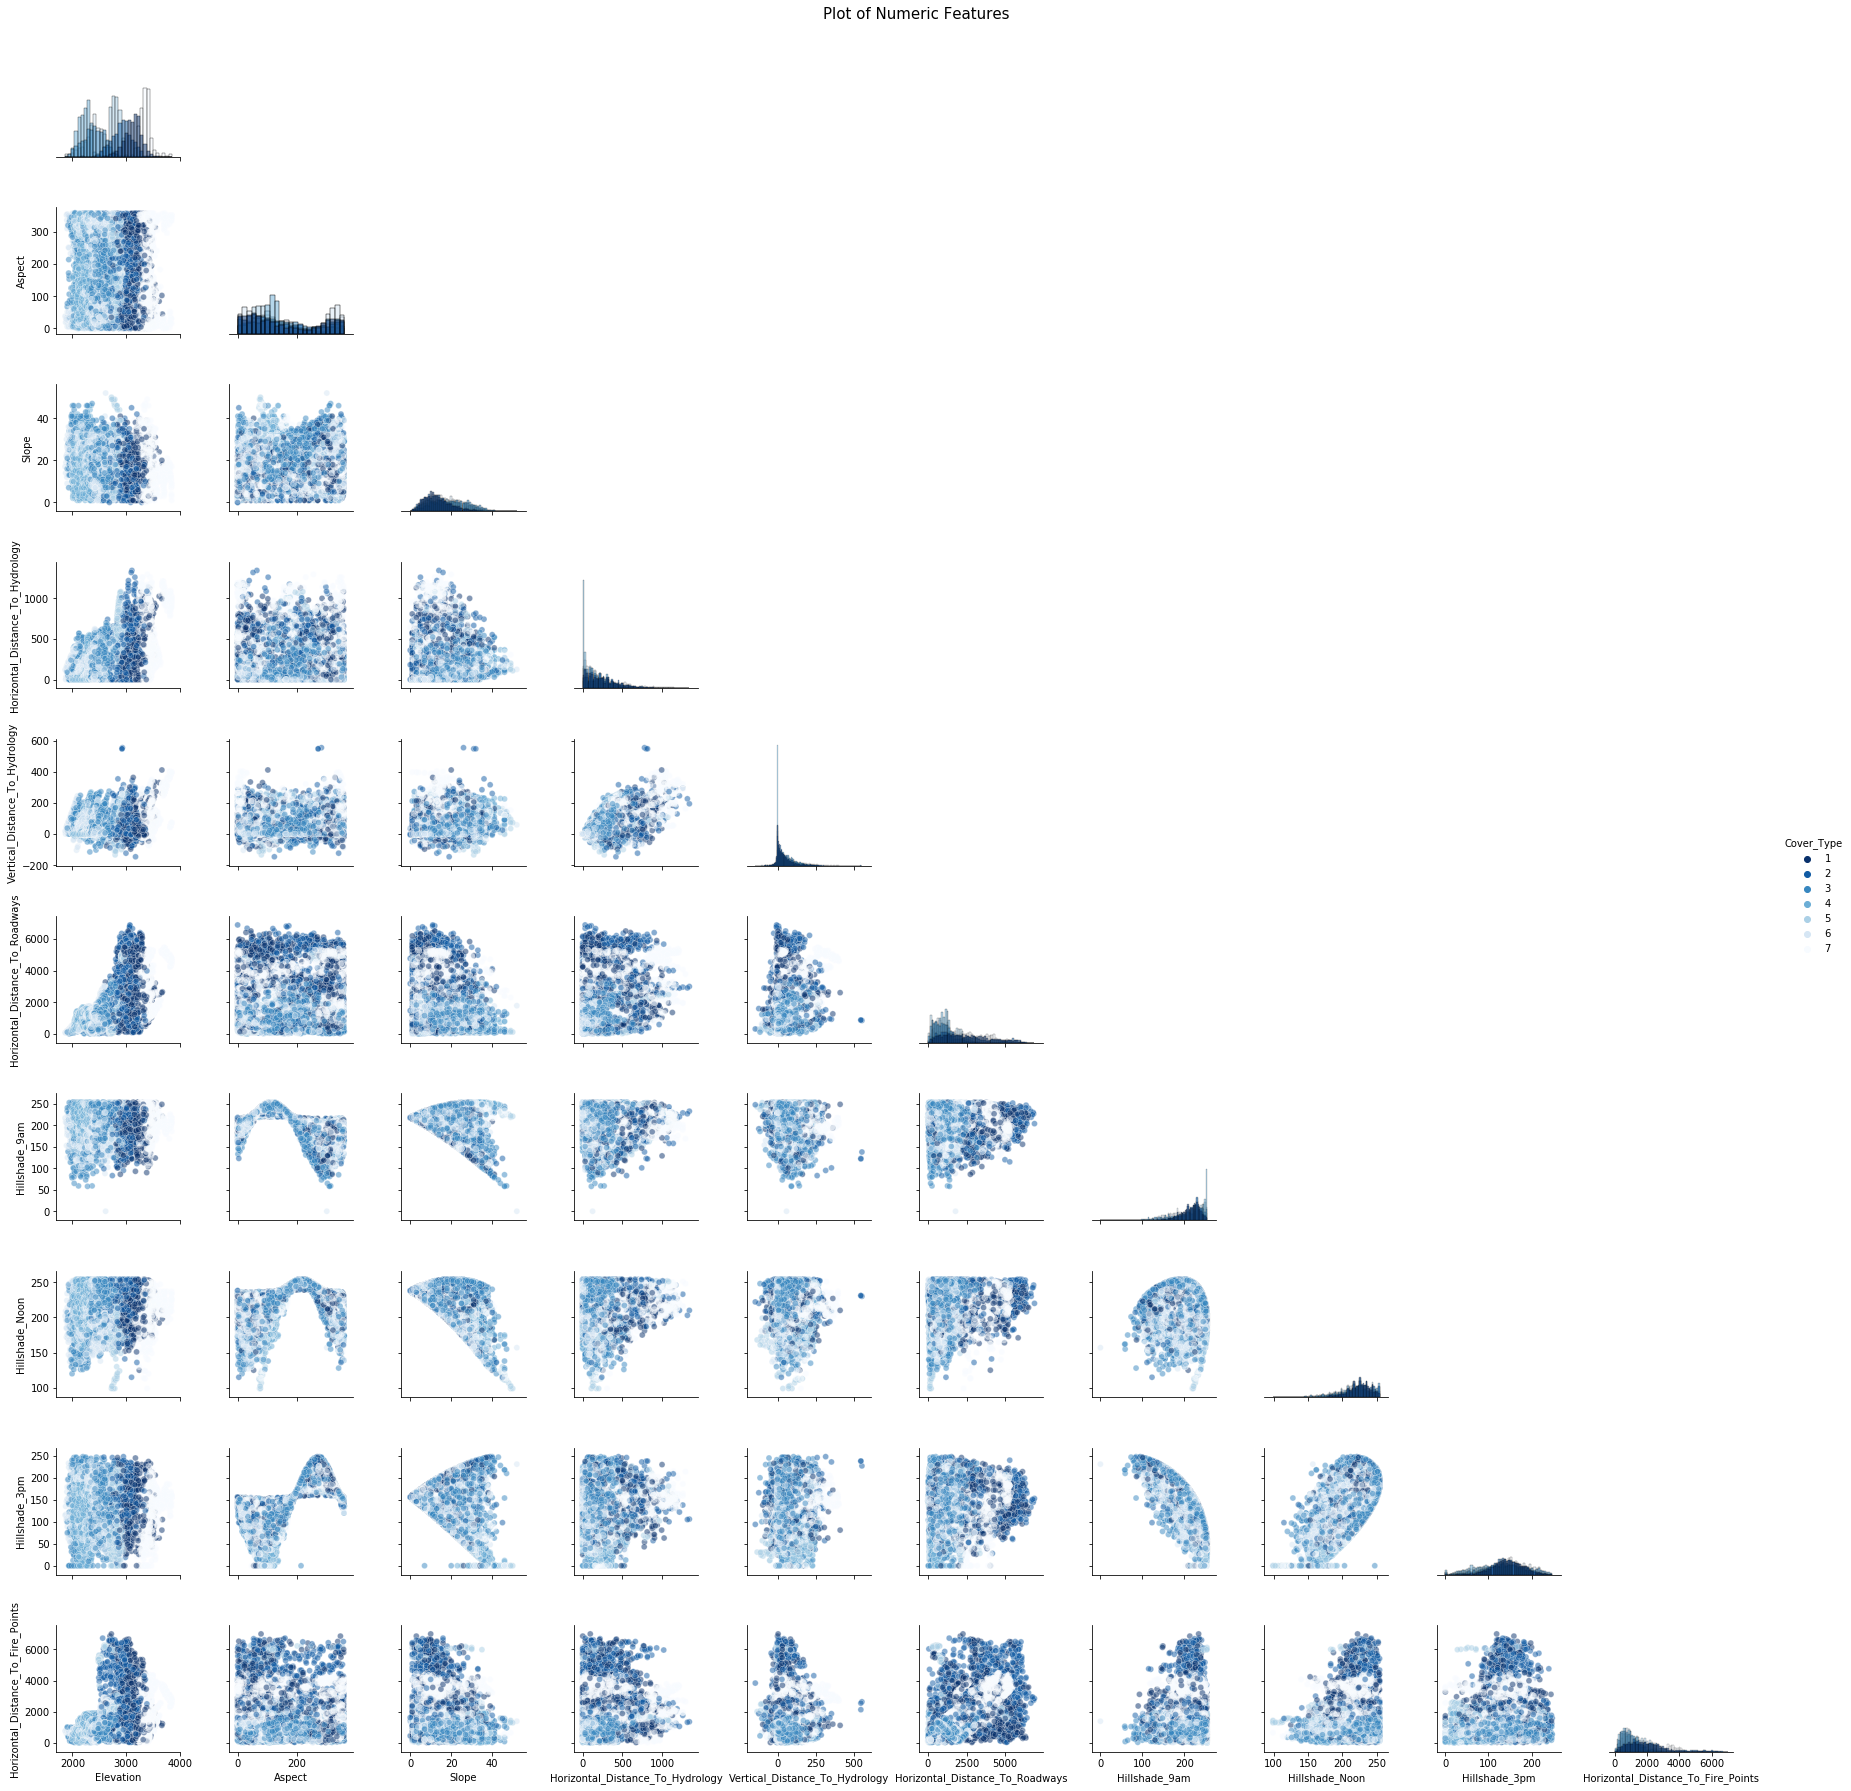

In [13]:
# Plotting scatter plots of numeric features by cover_type

# Creating pair plot
graph = sns.pairplot(data = data_numeric, 
                     hue = "Cover_Type",
                     palette='Blues_r',
                     diag_kind="hist",
                     corner=True,
                     plot_kws={'alpha': 0.5})

# Adding title to figure
graph.fig.suptitle("Plot of Numeric Features", y=1, fontsize = 15)
plt.show()

We can infer several points from the correlation and pairplot graphs. From the correlation matrix we have several pairings of highly positively and negatively correlated numeric features. From the scatter plots we can see that certain features highly influence the target variable - ...... Let's take a closer look at the interaction of these features with the "Cover_Type".

Positively correlated pairings
 - `horizontal distance to hydrology` with `Vertical distance to hydrology` and `elevation`
 - `hillshade_3pm` with `hillshade_noon` and `aspect`

Negatively correlated pairings
 - `hillshade_9am` with `aspect` and `hillshade_3pm`
 - `hillshade_noon` with `slope`


#### Visualizing Distribution of Numerical features by cover_type

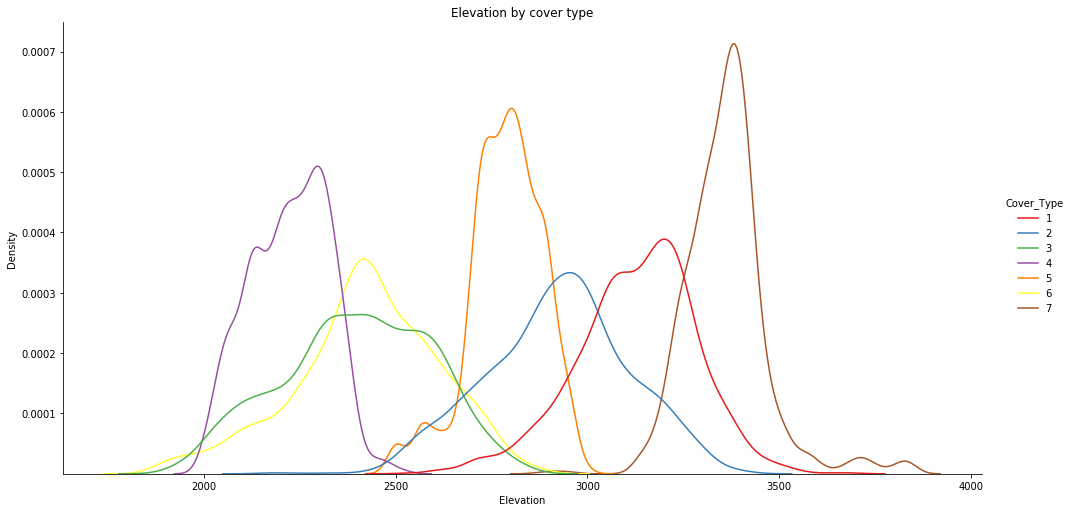

In [140]:
# Plotting distribution of Cover_Types by elevation

# Plotting Kernel Density Plots - not affected by bins used 
sns.displot(data, x="Elevation", 
    kind="kde",
    hue="Cover_Type",  
    palette="Set1", #"Accent or "Dark2"
    height=7, 
    aspect=2, 
    #fill=True,
).set(title = "Elevation by cover type")

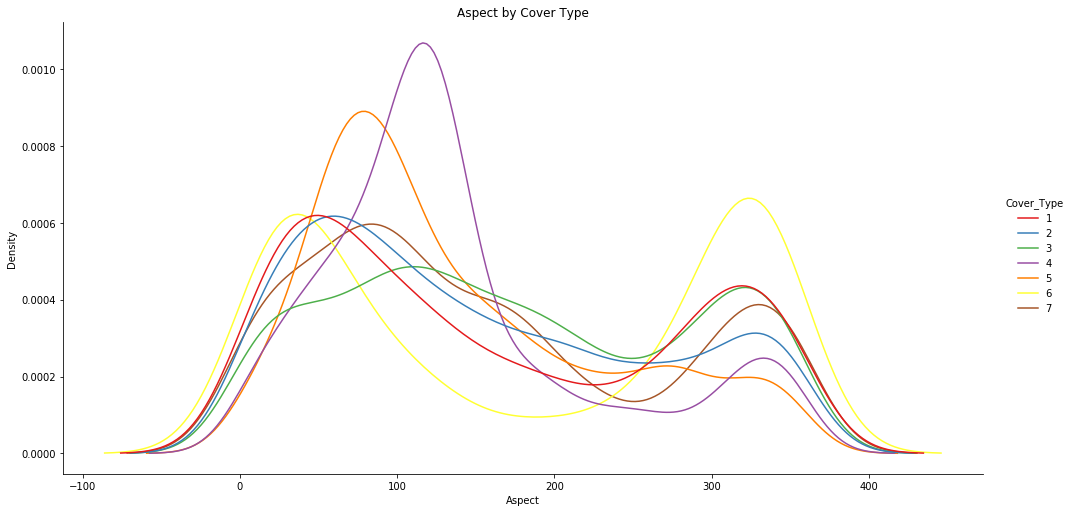

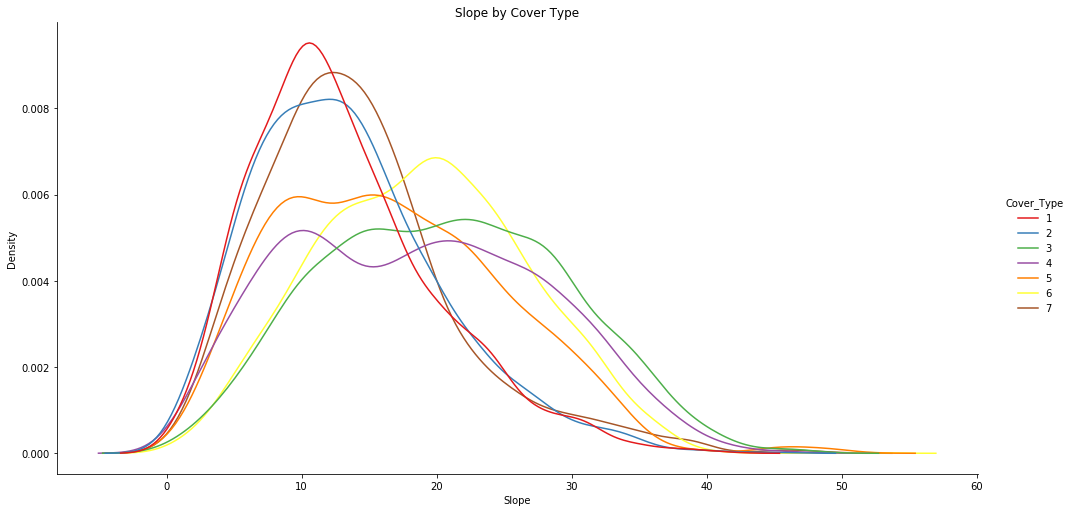

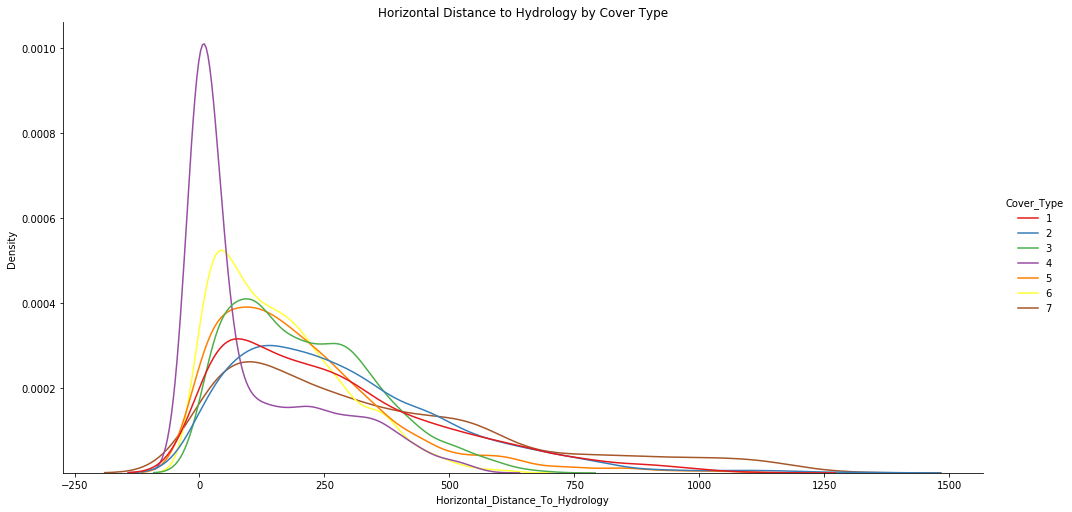

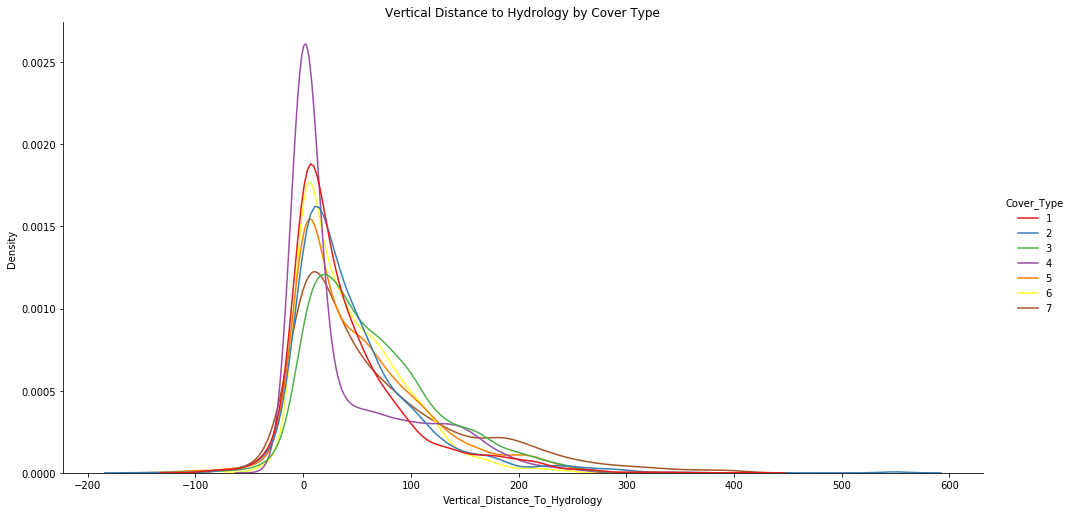

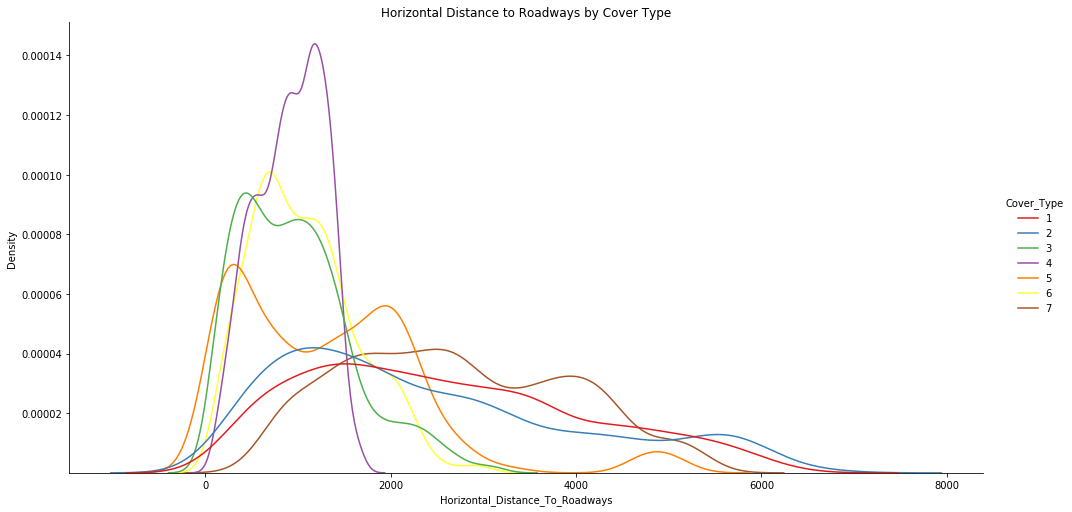

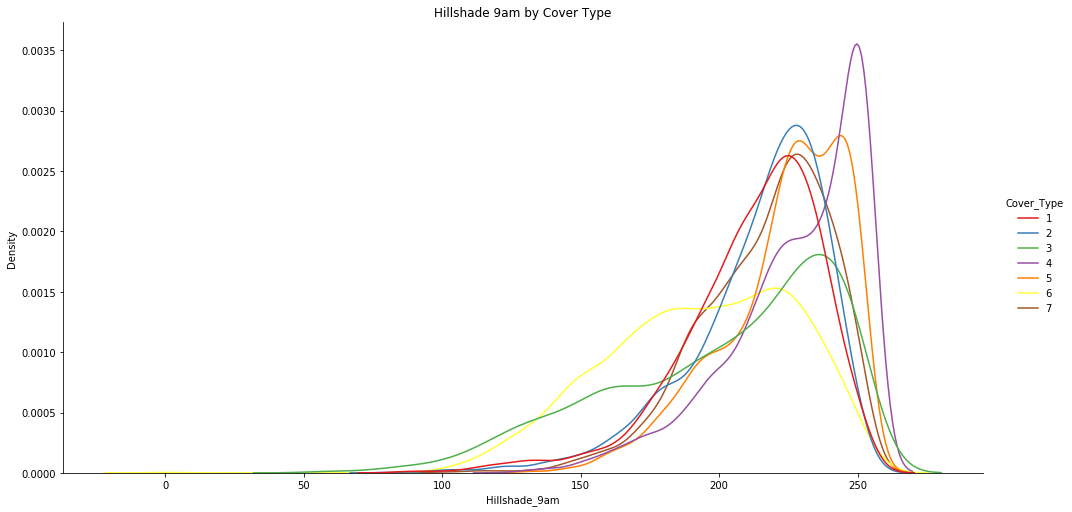

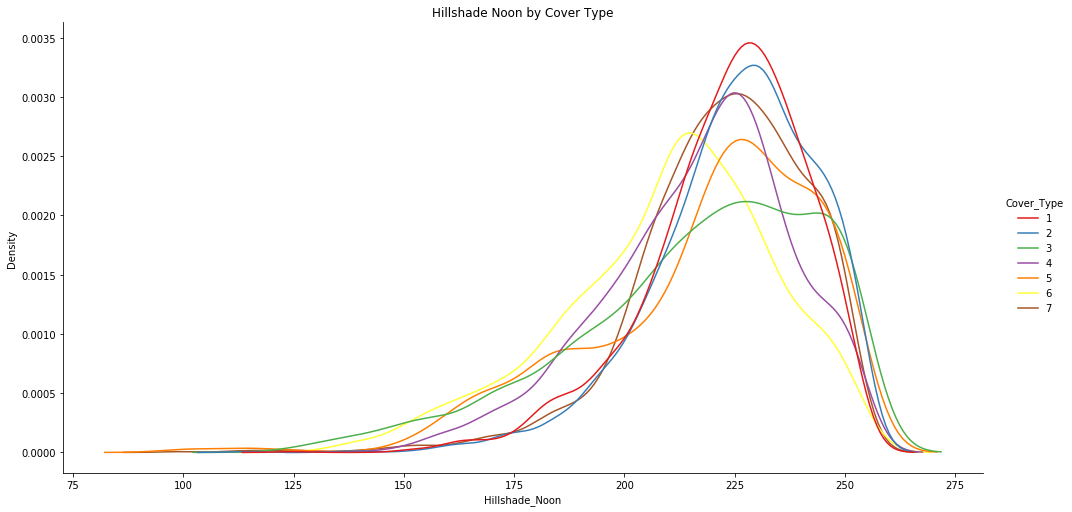

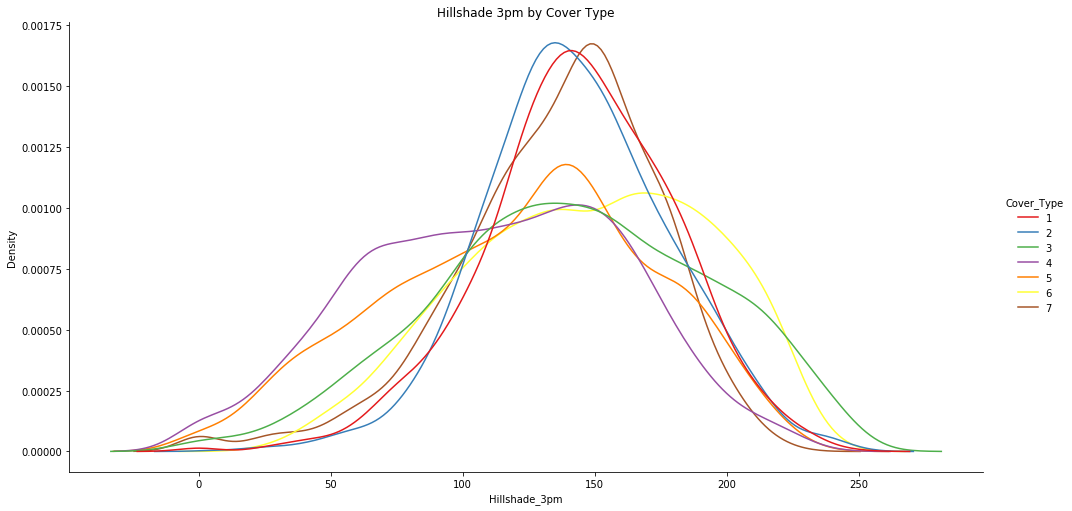

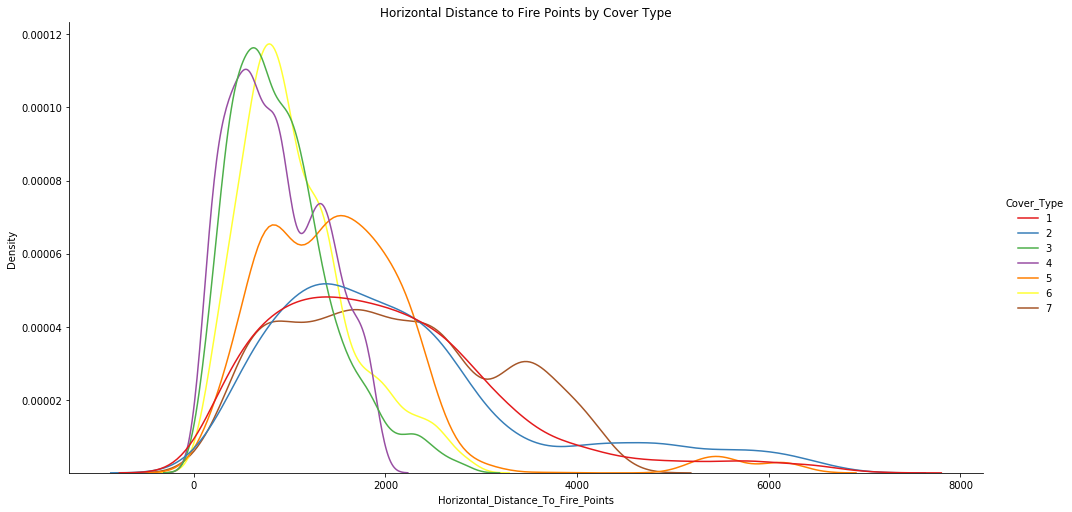

In [9]:
# Plotting distribution of Cover_Types by remaining numerical variables


#Density plots for all other numerical features -> less cover type distinction with these features
#Aspect
sns.displot(data, x="Aspect", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Aspect by Cover Type')

#Slope
sns.displot(data, x="Slope", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Slope by Cover Type')

#Horizontal_Distance_To_Hydrology
sns.displot(data, x="Horizontal_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Hydrology by Cover Type')

#Vertical_Distance_To_Hydrology
sns.displot(data, x="Vertical_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Vertical Distance to Hydrology by Cover Type')

#Horizontal_Distance_To_Roadways
sns.displot(data, x="Horizontal_Distance_To_Roadways", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Roadways by Cover Type')

#Hillshade_9am
sns.displot(data, x="Hillshade_9am", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 9am by Cover Type')

#Hillshade_Noon
sns.displot(data, x="Hillshade_Noon", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade Noon by Cover Type')

#Hillshade_3pm
sns.displot(data, x="Hillshade_3pm", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 3pm by Cover Type')

#Horizontal_Distance_To_Fire_Points
sns.displot(data, x="Horizontal_Distance_To_Fire_Points", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Fire Points by Cover Type')

Text(0.5, 1.0, 'Horizontal Distance to Hydrology by Cover Type')

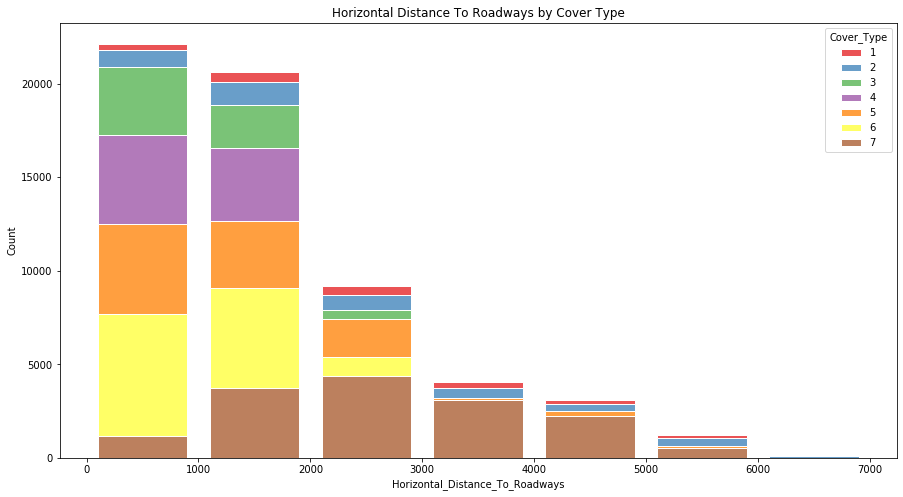

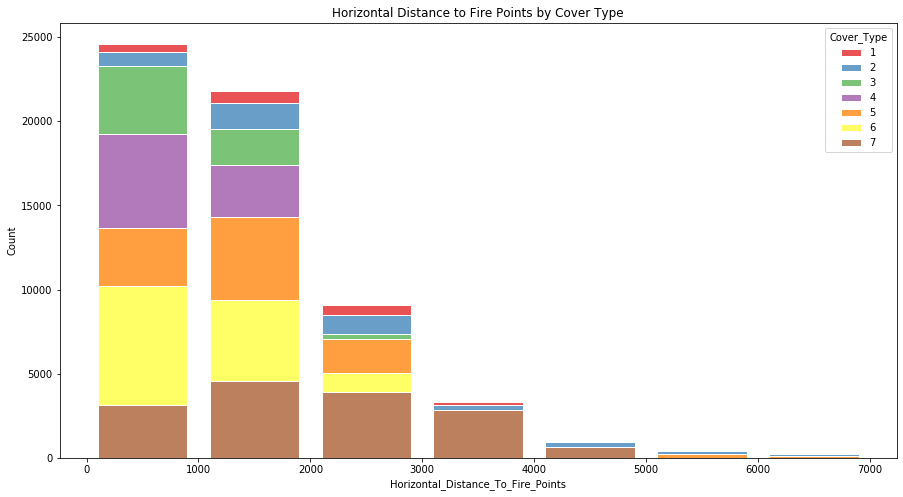

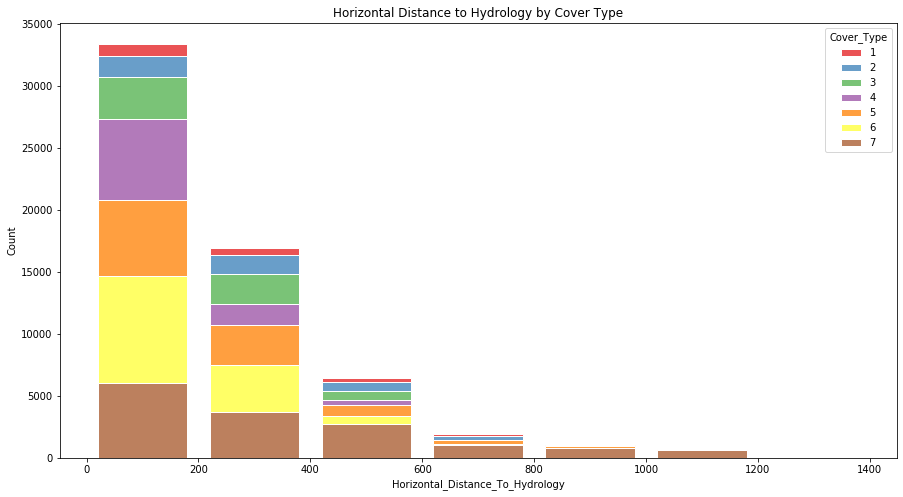

In [10]:
#Stacked bar plots for key numerical featuyres with cover_type: horizontal distance to roadways/fire points/hydrology
plt.figure(figsize=(15,8))
proximity_to_roadways = sns.histplot(data, x= "Horizontal_Distance_To_Roadways", bins=10, binwidth=1000, weights="Cover_Type",
hue="Cover_Type", multiple="stack", palette="Set1", edgecolor="white", shrink=0.8)
proximity_to_roadways.set_title('Horizontal Distance To Roadways by Cover Type')

plt.figure(figsize=(15,8))
proximity_to_firepoints = sns.histplot(data, x= "Horizontal_Distance_To_Fire_Points", bins=10, binwidth=1000, weights="Cover_Type", hue="Cover_Type",
multiple="stack", palette="Set1", edgecolor="white", shrink=0.8)
proximity_to_firepoints.set_title('Horizontal Distance to Fire Points by Cover Type')

plt.figure(figsize=(15,8))
proximity_to_hydrology = sns.histplot(data, x= "Horizontal_Distance_To_Hydrology", bins=10, binwidth=200, weights="Cover_Type", hue="Cover_Type",
multiple="stack", palette="Set1", edgecolor="white", shrink=0.8)
proximity_to_hydrology.set_title('Horizontal Distance to Hydrology by Cover Type')

Here, we can clearly see that elevation is a very important feature. For classification, this feature enables us to clearly distinguish between different types of Cover_Types, as they are clustered around different elevation levels. 

From here, we can use our intuition and infer that features who are themselves affected by the elevation, such as slope, aspect, vertical and horizontal based distance, might also have a strong interaction with cover_type. 

<a id='4'></a>
## 4. Baseline Model: Decision Tree Classifier

The goal in this first model is to create a simple model with very few changes to our raw data. This baseline model will serve as a reference point for all subsequent changes we make. By setting a baseline first, we can then see how each of our changes (such as feature creation or algorithm selection) affect the models performance.

Given the high number of features we have, our baseline model will be a `Decision Tree Classifier`. Not only can tree-based models handle a large feature sets with minimal cleaning, but Decision Tree classifier also have an in-built ranking of feature importance. This information will be very important going forward when conducting feature selection to improve our models. 


<a id='4.1'></a>
### 4.1 Defining model evaluation and feature extraction functions

To attain a nuanced understanding of our model evaluation, we will be using the accuracy, precision, recall, F1 scores as well as printing a confusion matrix for our test set predictions. To evaluate whether our model is overfitted, we will also print the accuracy score for a prediction on the train set.

To keep a clean notebook, we are defining the evaluation function and feature importance extractors upfront.

#### Model evaluation function

The inputs are: (1) model or pipeline fitted on the train data, (2) y_train data, and (3) y_test data.<br>
Outputs: (1) Confusion matrix and, (2) dataframe containing model evaluation metrics.

In [10]:
# Defining evaluation function

def evaluation(model_or_pipe, y_train, y_test,model_name):  
    
    #Creating empty list to store model evaluation result 
    model_result = []
    
    # Predict on test data
    y_test_prediction = model_or_pipe.predict(X_test)

    # Predict on train data
    X_test_prediction = model_or_pipe.predict(X_train)
    
    # Evaluating model with classification report and confusion matrix
    acc_test = accuracy_score(y_test, y_test_prediction)
    acc_train = accuracy_score(y_train, X_test_prediction)
    precision = precision_score(y_test, y_test_prediction, average = 'macro')
    recall = recall_score(y_test, y_test_prediction, average = 'macro')
    f1 = f1_score(y_test, y_test_prediction, average = 'macro')
    cm = confusion_matrix(y_test, y_test_prediction) 

    #Storing results in list as key - value pairs
    model_result.append({
    "model": model_name,
    "train_accuracy": acc_train,
    "test_accuracy": acc_test, 
    "precision": precision,
    "recall":recall,
    "f1": f1
    })
    
    # Converting dictionary to dataframe
    accuracy_score_df = pd.DataFrame(model_result).set_index("model")

    
    # Plotting confusion matrix
    cm_df = pd.DataFrame(cm, 
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
    plt.figure(figsize=(8,8))
    sns.heatmap(cm_df, annot=True, square=True, linewidths=1, cbar_kws={"shrink": .5})
    plt.title(f"{model_name} \n Confusion Matrix", 
          size = 20, 
          pad = 15)
    plt.ylabel("Observed", size = 18, labelpad = 13)
    plt.xlabel("Predicted", size = 18, labelpad = 13)
    plt.show()
    
    # Printing dataframe with model evaluation metrics
    return accuracy_score_df

#### Feature importance function

The inputs are: model or pipeline fitted on the training data <br>
Outputs: dataframe containing features and respective importance score by descending order.

In [7]:
# Defining feature importance function

def feature_importance(model_or_pipe):
    feat_imp = model_or_pipe.feature_importances_
    features = X_train.columns
    feat_imp_dt = pd.DataFrame({
        "feature": features, 
        "importance": feat_imp
    }).sort_values(by="importance", ascending=False).reset_index(drop=True)

    return feat_imp_dt

<a id='4.2'></a>
### 4.2 Running Model

##### Splitting test and training sets

In [10]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [11]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 54)
y_Train: (12096,)
X_Test: (3024, 54)
y_Test: (3024,)


##### Building and Fitting Baseline Model

As we want to make no changes to our data, for our baseline model there is not need to pass a pipeline.

In [12]:
#Defining model to use and model name
model_0 = tree.DecisionTreeClassifier(random_state = 42)
model_0_name = "Decision Tree Classifier"

In [13]:
# Fitting model 
model_0.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

##### Evaluating model

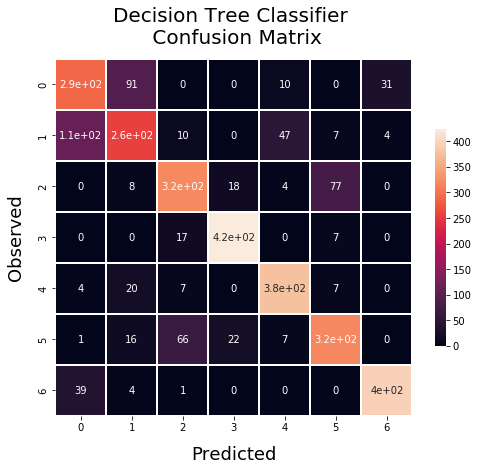

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Decision Tree Classifier,1.0,0.78869,0.785879,0.788125,0.786441


In [14]:
# Printing model performance
evaluation(model_0, y_train, y_test, model_0_name)

With a completed baseline model, we see that accuracy on the test set (the most important metric) has a score of 79%, which is not a bad starting point from considering no feature engineering or hyperparameter tuning.

As expected, our Decision Tree has overfitted the training data. Without cross validation or pruning, this is to be expected. Our model currently has high variance and low bias. Later on, we can try Bagging and/or Boosting implementations of tree-based methods to mitigate the overfitting. 

#### Feature importance

In [23]:
# Calculating feature importance
feature_importance = feature_importance(model_0)


In [138]:
feature_importance

<function __main__.feature_importance(model_or_pipe)>

In [42]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.892


As expected, elevation is the feature with the highest importance, followed by (as expected) the three features with with the highest correlation coefficient with elevation. 

We can also observe that the top 10 most importance features are all the numeric features. The binary features do not score well, with the highest score for Soil_Type4 at 0.015 - which is still very low. We can infer from this that binary features add very little information to our model. 

<a id='5'></a>
## 5. Changing our Model - Features

Now that we have a baseline model. We can improve the performance by trying to create new features, or reduce the number of features to elimnate redundancy in our dataset.

<a id='5.1'></a>
### 5.1 Decision Tree Classifier with Extra Features

The first changes that need to be made in order to improve the model's performance is the creation of new features in order to extract more valuable information from those originally provided. 

Although we already have many features, we see that information gain from 44 binary features is only 10%. Just the 10 numerical features explain 90% of the variance. Creating features from the numerical features might therefore be a good idea. Let's try it out!



Many of the numerical features measure the distance of trees to landmarks in the ecosystem: fire points, hydrology, roadways. Although were are not expert in forestry, perhaps combining these values through average, sums and differences and adding them to our dataset might yield interesting results.


In [11]:
# Mean distances

data['Mean_Amenities'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            data.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

data['Mean_Fire_Hyd'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
data['Mean_Elevation_Vertical_Distance_Hydrology'] = (data.loc[:,'Elevation'] 
                                                    + data.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
data['Mean_Distance_Hydrology_Firepoints'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + data.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
data['Mean_Distance_Hydrology_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['Mean_Distance_Firepoints_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['EVDTH'] = data['Elevation'] - data['Vertical_Distance_To_Hydrology']


In [12]:
# Sums and Differences

data['HF1'] = data.loc[:,'Horizontal_Distance_To_Hydrology'] + data.loc[:,'Horizontal_Distance_To_Fire_Points']

data['HF2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Fire_Points'])

data['HR1'] = abs(data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways'])

data['HR2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Roadways'])

data['FR1'] = abs(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Roadways'])

data['FR2'] = abs(data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Roadways'])


In [13]:
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [14]:
wilderness_train = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_train = data.loc[:,'Soil_Type1':'Soil_Type40']

data["wilderness"] = reverse_encode(wilderness_train)

data["soiltypes"] = reverse_encode(soiltype_train)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


#### Splitting Data

In [9]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [65]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


#### Buiding and Fitting model to train data

In [66]:
#Defining model to use and model name
model_1 = tree.DecisionTreeClassifier(random_state = 42)
model_1_name = "Decision Tree Classifier with New Features"

In [67]:
# Fitting model 
model_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Evaluating Model

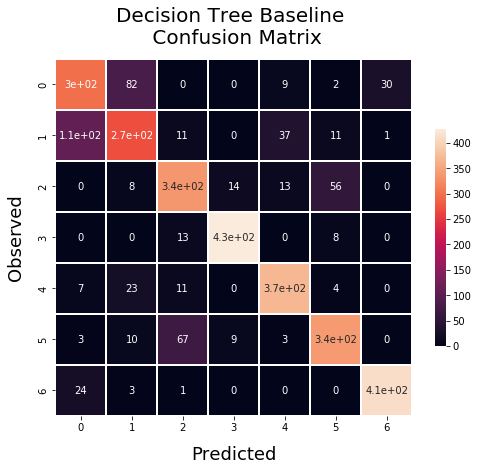

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
classifier,1.0,0.812169,0.809777,0.811445,0.810235


In [68]:
# Printing model performance
evaluation(model_1, y_train, y_test )

In [71]:
# Calculating feature importance
feature_importance = feature_importance(model_1)


In [76]:
feature_importance.iloc[0:15,:]

,feature,importance
0,EVDTH,0.207064
1,soiltypes,0.138527
2,Elevation,0.134734
3,Hillshade_9am,0.050692
4,Horizontal_Distance_To_Hydrology,0.042016
5,Mean_Distance_Firepoints_Roadways,0.038404
6,FR2,0.034831
7,HR2,0.029697
8,HF2,0.025093
9,Hillshade_3pm,0.023419


In [59]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.721


After adding new featues to our baseline DecisionTree, we see that accuracy has improved by 3% to 81%. 

We can also see that the top 10 features no explain only 72% of the data against the previous 90% without new features. Of the new features created, EVDTH, soiltypes mean distance_firepoints_roadways, FR2, HR2 and HF2 have made it into the top 10. 

This might indicate that the new features we have created are simply highly correlated to the pre-existing numerical features. Although we have increased our accuracy, perhaps we may have introduced redundancy to our dataset. We can check this by plotting a heatmap correlation matrix of our new features.


#### Correlation matrix of previous and newly created numerical features

In [15]:
# Creating dataframe with only numerical features
data_numeric_extra = data.drop(columns = data_binary.columns)

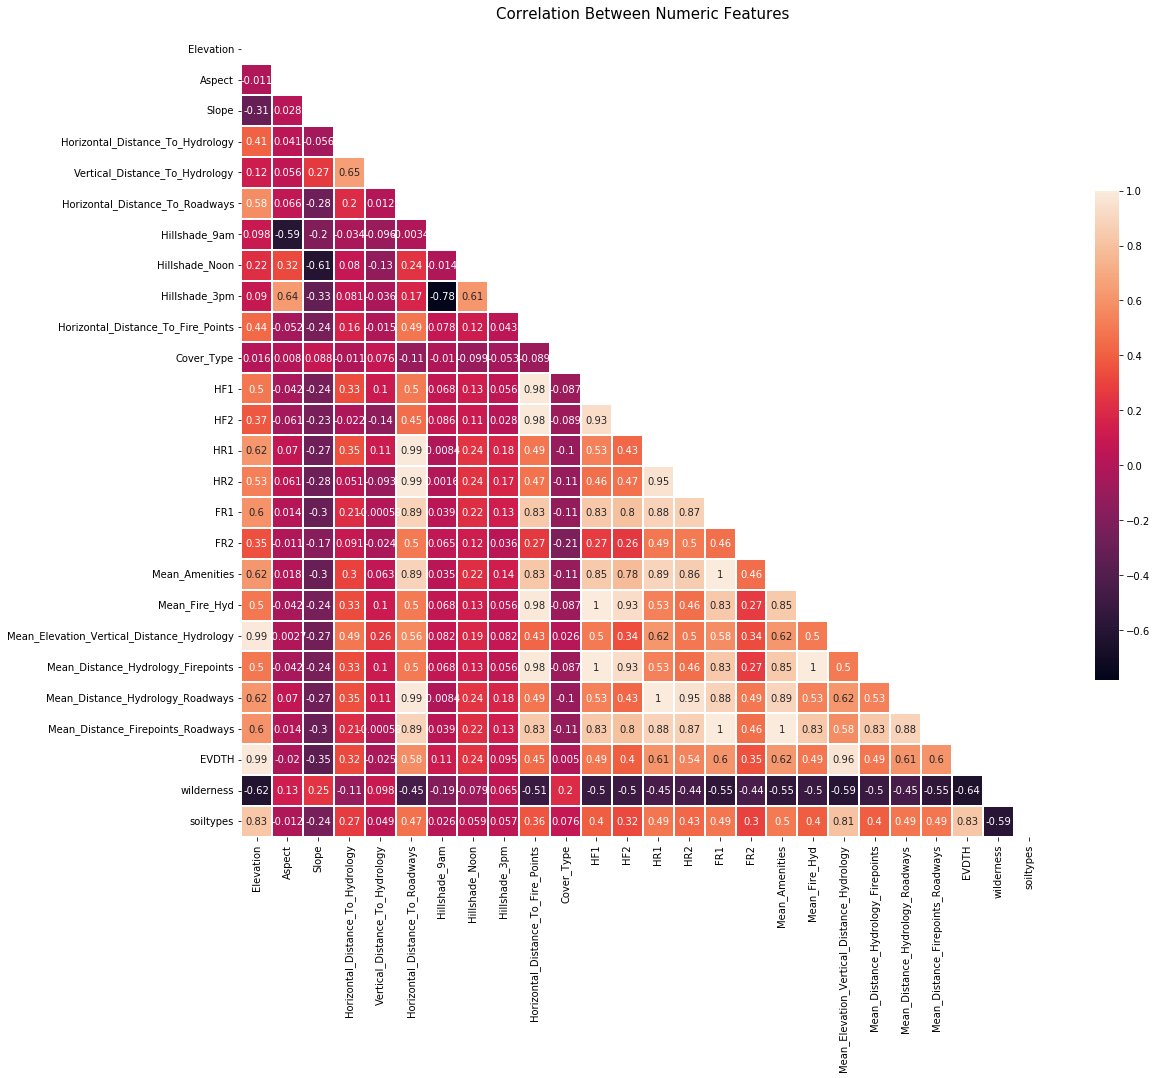

In [99]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric_extra.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(18,18))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

From a quick viewing, we can see that we the correlation matrix has many highly and perfectly correlated variables. Therefore the consquence of adding more features has been to add redundancy to our dataset. 


Adding features did not add too much to our accuracy. Given that we have 54 predictors, we could also try a feature selection technique, such as PCA on the numerical variables. Although this is typically done when the ratio of a dataset's dimensions is large compared to the number of observations, it pays to try new techniques.

<a id='6'></a>
## 6. Changing our Model - Algorithm

Decision Tree Classifier is a simple implementation of tree-based methods. Now we want to try some more complex algorithms. Secifically, RandomForest and ExtraTree Classifiers.

<a id='6.1'></a>
### 6.1 Random Forest Classifier with Extra Features

Random Forest Classifier is a more sophisticated implementation of Decision Trees that uses Bagging. Bagging invovled creating many Decision Trees using sub-samples of the training data (with replacement), and then averaging the model to optimize variance and bias.

Without any pruning, Bagging results in models that can generalize better than a single decision tree. 

#### Splitting train and test data

In [148]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [149]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


#### Buiding and Fitting model to train data

In [151]:
#Defining model to use and model name
model_2 = RandomForestClassifier(random_state = 42)
model_2_name = "Random Forest Classifier with New Features"

In [152]:
# Fitting model 
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Evaluating Model

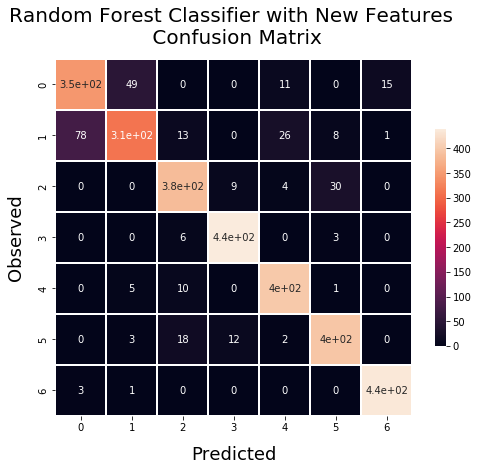

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Random Forest Classifier with New Features,1.0,0.898148,0.895866,0.897871,0.895884


In [173]:
# Printing model performance
evaluation(model_2, y_train, y_test, model_2_name)

The Random Forest Classifier performs significantly better than the Decision Tree Classifier. Trained on the datase with exdtra features, the model accuracy jumped by approximately from 81% to 89%. 

<a id='6.2'></a>
### 6.2 Gradient Boosted Classifier with Extra Features

Gradient Boosting is a more sophisticated implementation of Decision Trees that uses Boosting. Unlike the Random Forest classifier that trains many trees in parallel and combines the results, Boosting is more sophisticated. The trees are built sequentially, with each new tree created to minimize the prediction error of the previous tree. Performance is evaluated along the way resulting in a optimized calculation.

#### Splitting train and test data

In [ ]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Buiding and Fitting model to train data

In [156]:
#Defining model to use and model name
model_3 = GradientBoostingClassifier(random_state = 42)
model_3_name = "Gradient Boosting Classifier with New Features"

In [157]:
# Fitting model 
model_3.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Evaluating Model

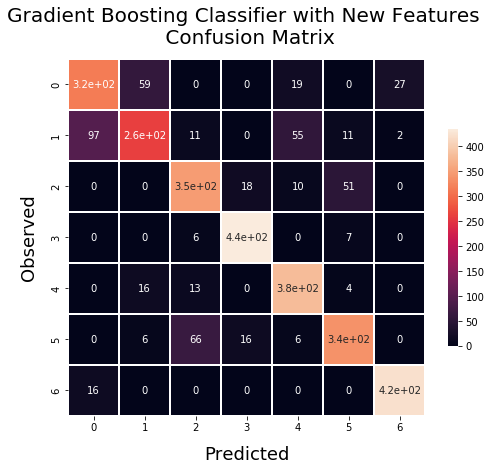

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Gradient Boosting Classifier with New Features,0.869461,0.829365,0.825781,0.82885,0.825145


In [172]:
# Printing model performance
evaluation(model_3, y_train, y_test, model_3_name)

The performance of the Gradient Boosting model was not an improveent over our Random Forest. Improving the model accuracy by a single percentage point. Due to the nature of how Gradient Boosting is calculated it requires some degree of hyperparameter tuning to truly be effective. 

<a id='6.3'></a>
### 6.3 Extra Trees Classifier (Extrememely Randomized Trees) with Extra Features

Extra Trees Classifier follows a similar implementation to Random Forest with two key differences. First, unless specified, it does not boostrap, therefore it samples randomly without replacement. Second, nodes are split randomly, rather than on the best splits, i.e. independent of the labels of the train set.

Another consideration is that Extra Trees are computationally faster than Random Forest Classifiers.

#### Splitting train and test data

In [161]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

#### Buiding and Fitting model to train data

In [162]:
#Defining model to use and model name
model_4 = ExtraTreesClassifier(random_state = 42)
model_4_name = "Extra Trees Classifier with New Features"

In [163]:
# Fitting model 
model_4.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

#### Evaluating Model

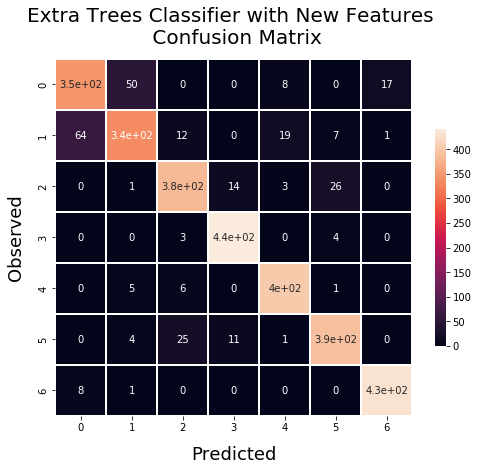

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Extra Trees Classifier with New Features,1.0,0.90377,0.901896,0.903442,0.902238


In [171]:
# Printing model performance
evaluation(model_4, y_train, y_test, model_4_name)

The Extra Trees Classifier performs significantly better than the Decision Tree Classifier, and best among the more sophisticated implementation of tree based algorithms. Trained on the datase with extra features, the model accuracy is 90%. 

This leads us to the next step in our proccess, where we will perform hyperparameter tuning on both the Random Forest Model and the Extra Trees model in order to fine-tune each of them. Since both achieved similar accuracy scores, it makes sense to tune both of them. Given their slight differnce in implementation, one might perform better than the other given the dataset.

Furthermore, by tuning the models, we can begin dealing with the problem of being overvitted.

<a id='7'></a>
## 7. Changing our Model - Hyperparameter Tuning

The best performing models were Random Forest and Extra Trees classifier with extra features generated. We can now pass on to the next phase and tune the hyperparameters of these models. 

Lastly, we can pass the tuned hyperparameters to a voting classifier to combine the results of the best models.

<a id='7.1'></a>
### 7.1 Random Forest GridSearch CV

##### Splitting data for training and test set

In [17]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting grid search to train data

In [20]:
grid_search = GridSearchCV(
                        RandomForestClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
grid_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

NameError: name 'random_grid' is not defined

Passing a rather large hyperparamter grid took 9 hours to process. A tad bit time consuming. 
By fishing out the optimal parameters and passing them to a RandomForest classifier, we can evaluate if this tuning was worth the time.


In [132]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 725}

In [22]:
# Optimal parameters
rfbest_bootstrap = False
rfbest_max_depth = 50
rfbest_max_features = "auto"
rfbest_min_samples_leaf = 1
rfbest_min_samples_split = 2
rfbest_n_estimators = 752

##### Buiding and Fitting model to train data

In [23]:
#Defining model to use and model name
model_5 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rfbest_n_estimators,
                                 max_depth = rfbest_max_depth,
                                 min_samples_split = rfbest_min_samples_split,
                                 min_samples_leaf = rfbest_min_samples_leaf,
                                 max_features = rfbest_max_features,
                                 bootstrap = rfbest_bootstrap)


model_5_name = "Tuned Random Forest Classifier with New Features"

In [24]:
# Fitting model 
model_5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=752,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##### Evaluating model

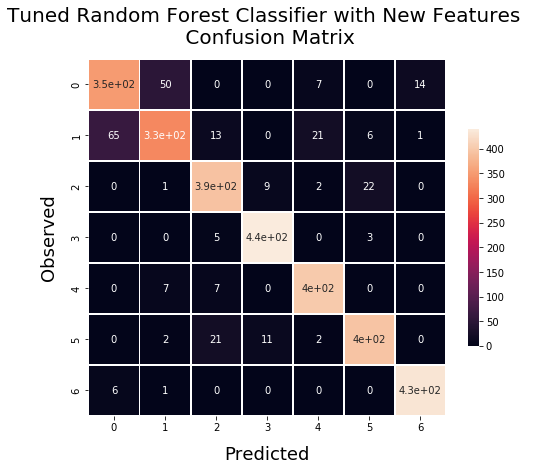

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Tuned Random Forest Classifier with New Features,1.0,0.90873,0.906913,0.908456,0.907224


In [21]:
# Printing model performance
evaluation(model_5, y_train, y_test, model_5_name)

Accuracy only improved by 1% from our previous un-tuned RandomForest Classifier. Although this is a welcome improvement, it may have not been worth the 9 hours. For our next models, we can try a RandomSearchCV.

The benefits of a random search cv versus a grid search cv comes down to resource use. A random search iterates through the hyperparameter combinations by identifying a direction that works and evaluating hyperparameters that maintain this direction. Therefore, we can pass a large parameter grid, and iterate more quickly through it than with a GridSearch. 

<a id='7.2'></a>
### 7.2 Extra Trees Classifier - Random Search CV

##### Splitting data for training and test set

In [18]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [154]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting Random search to train data

In [155]:
rnd_search = RandomizedSearchCV(
                        ExtraTreesClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
rnd_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Training time: 73.96936297416687s


The improvement in processing time is astounding. In just over 1 minute we have iterated over the parameter grid to find an optimal model. We can now investigate what impact this has had on model performance.

In [157]:
rnd_search.best_params_

{'n_estimators': 575,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [19]:
# Optimal parameters
etbest_bootstrap = False
etbest_max_depth = 50
etbest_max_features = "sqrt"
etbest_min_samples_leaf = 1
etbest_min_samples_split = 2
etbest_n_estimators = 575

##### Buiding and Fitting model to train data

In [20]:
#Defining model to use and model name
model_6 = ExtraTreesClassifier(random_state = 42,
                                 n_estimators = etbest_n_estimators,
                                 max_depth = etbest_max_depth,
                                 min_samples_split = etbest_min_samples_split,
                                 min_samples_leaf = etbest_min_samples_leaf,
                                 max_features = etbest_max_features,
                                 bootstrap = etbest_bootstrap)


model_6_name = "Tuned Extra Trees Classifier with New Features"

In [21]:
# Fitting model 
model_6.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=50, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=575,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

##### Evaluating Model

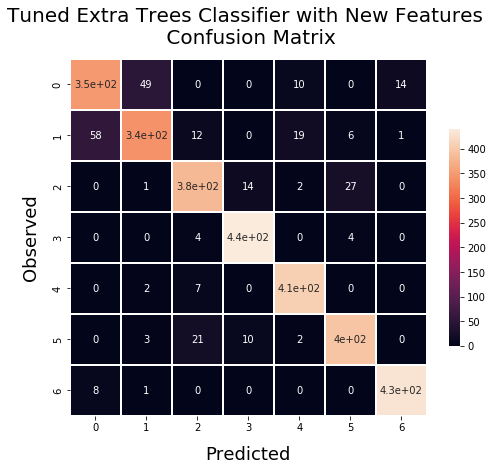

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Tuned Extra Trees Classifier with New Features,1.0,0.909061,0.90734,0.908769,0.907622


In [25]:
# Printing model performance
evaluation(model_6, y_train, y_test, model_6_name)

The improvement in model performance is insignificant, rising only by 0.06% with a RandomSearch. 


<a id='8'></a>
# 8. Final Model - Voting Classifier

We have two models with impressive test accuracies (90%) trained on the same data with extra features: (1) Random Forest Classifier tuned with a gridsearch, and (2) Extra trees Classifier tuned with a random search.

Combining these two is a prudent next step. By combining the results of the two models we are able to leverage thier different approaches and cancel out their respective drawbacks. 

We can combine our models using a Voting Classifier. This allows us to impute both of our trained models and average their predictions to output a final result that reflects both of their calculations. 

In [31]:
# Saving Random Forest (Model_5) and Extra Trees (Model_6) to new variables
model_1 = model_5
model_2 = model_6

# Training Classifiers
voting = VotingClassifier(estimators=[('RF', model_1), ('ET', model_2)], n_jobs = -1)

voting_name = "Voting Classifier with RF & ET"

In [32]:
voting_classifier = voting.fit(X_train, y_train)

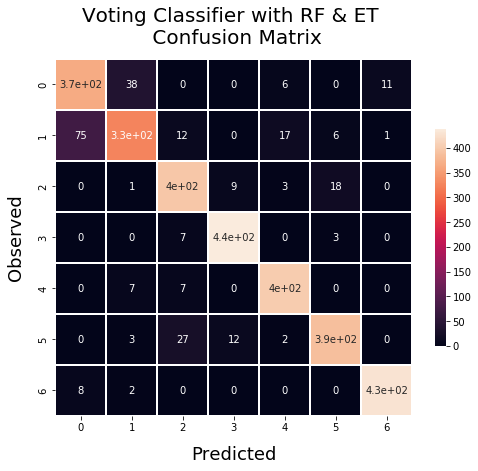

,train_accuracy,test_accuracy,precision,recall,f1
model,,,,,
Voting Classifier with RF & ET,1.0,0.909061,0.908495,0.909,0.907809


In [33]:
evaluation(voting_classifier, y_train, y_test, voting_name)

The Voting Classifier has not improved the model accuracy beyond what the Extra Trees Classifier was already able to achieve.

##### Conducting Feature Creation on Tester dataset

In [25]:
# Mean distances

tester['Mean_Amenities'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            tester.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

tester['Mean_Fire_Hyd'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
tester['Mean_Elevation_Vertical_Distance_Hydrology'] = (tester.loc[:,'Elevation'] 
                                                    + tester.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
tester['Mean_Distance_Hydrology_Firepoints'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + tester.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
tester['Mean_Distance_Hydrology_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['Mean_Distance_Firepoints_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['EVDTH'] = tester['Elevation'] - tester['Vertical_Distance_To_Hydrology']


In [26]:
# Sums and Differences

tester['HF1'] = tester.loc[:,'Horizontal_Distance_To_Hydrology'] + tester.loc[:,'Horizontal_Distance_To_Fire_Points']

tester['HF2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Fire_Points'])

tester['HR1'] = abs(tester['Horizontal_Distance_To_Hydrology'] + tester['Horizontal_Distance_To_Roadways'])

tester['HR2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Roadways'])

tester['FR1'] = abs(tester['Horizontal_Distance_To_Fire_Points'] + tester['Horizontal_Distance_To_Roadways'])

tester['FR2'] = abs(tester['Horizontal_Distance_To_Fire_Points'] - tester['Horizontal_Distance_To_Roadways'])


In [27]:
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [28]:
wilderness_test = tester.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_test = tester.loc[:,'Soil_Type1':'Soil_Type40']

tester["wilderness"] = reverse_encode(wilderness_test)

tester["soiltypes"] = reverse_encode(soiltype_test)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


In [29]:
len(tester.columns) == len(X_train.columns)

True

tester_Id = tester["Id"]

tester = tester.drop(tester.loc[:,"Soil_Type1":"Soil_Type40"], axis = 1)
tester = tester.drop(tester.loc[:,'Wilderness_Area1':'Wilderness_Area4'], axis = 1)

tester = tester.drop(["Id"], axis=1)

##### Predicting on Tester

In [34]:
y_test_pred = voting.predict(tester)

In [35]:
y_test_pred

array([1, 1, 1, ..., 3, 3, 3])

In [39]:
tester

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,EVDTH,HF1,HF2,HR1,HR2,FR1,FR2,wilderness,soiltypes,id
0,2680,354,14,0,0,2684,196,214,156,6645,...,2680,6645,6645,2684,2684,9329,3961,1,29,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,2683,6675,6675,2654,2654,9329,4021,1,29,1
2,2713,16,15,0,0,2980,206,208,137,6344,...,2713,6344,6344,2980,2980,9324,3364,1,29,2
3,2709,24,17,0,0,2950,208,201,125,6374,...,2709,6374,6374,2950,2950,9324,3424,1,29,3
4,2706,29,19,0,0,2920,210,195,115,6404,...,2706,6404,6404,2920,2920,9324,3484,1,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,2396,153,20,85,17,108,240,237,118,837,...,2379,922,752,193,23,945,729,3,2,565887
565888,2391,152,19,67,12,95,240,237,119,845,...,2379,912,778,162,28,940,750,3,2,565888
565889,2386,159,17,60,7,90,236,241,130,854,...,2379,914,794,150,30,944,764,3,2,565889
565890,2384,170,15,60,5,90,230,245,143,864,...,2379,924,804,150,30,954,774,3,2,565890


##### Creation Submission file

In [38]:
# Creating dataframe
submission = pd.DataFrame()

# Creating id column with zero-based index
tester["id"] = tester.index
tester_Id = tester["id"]
submission["Id"] = tester_Id

# Adding prediction for covertype 
submission["Cover_type"] = y_test_pred

submission = submission.set_index("Id")
sub_file = submission.to_csv("sub_file")

In [37]:
submission

,Cover_type
Id,
0,1
1,1
2,1
3,1
4,1
...,...
565887,3
565888,3
565889,3
